In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2


In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

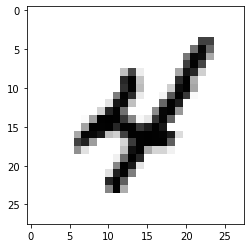

In [10]:
plt.imshow(x_train[9],cmap = plt.cm.binary)

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
input_shape = (28,28,1)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
from tensorflow import keras


In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [15]:
model.compile(loss="categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [16]:
history = model.fit(
    x_train, y_train, epochs=15,batch_size = 64, validation_data=(x_test, y_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 38s 629us/sample - loss: 0.2525 - accuracy: 0.9240 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 2/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0877 - accuracy: 0.9732 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 3/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.0387 - val_accuracy: 0.9875
Epoch 4/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0307 - val_accuracy: 0.9895
Epoch 5/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0502 - accuracy: 0.9834 - val_loss: 0.0311 - val_accuracy: 0.9890
Epoch 6/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0253 - val_accuracy: 0.9912
Epoch 7/15
60000/60000 [==============================

In [17]:
model.save('num_model.h5')

In [99]:
print(tf.__version__)

2.1.0
